# CART

Importamos las librerias basicas y `tree` de sklearn junto con `graphviz` para la visualización de los resultados.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cross_validation import train_test_split
from sklearn import tree
import graphviz

In [3]:
data = pd.read_csv('breast_cancer.csv')

In [4]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Primero tenemos que eliminar los missing values que encontramos en las secciones anteriores y eliminar la columna de id.

In [5]:
data = data.replace('?', np.nan)

In [6]:
data = data.dropna(axis=0)

In [10]:
data = data.drop('Sample code number', axis=1)

In [11]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [17]:
data[' Bare Nuclei'].mean()

inf

Podemos ver que los datos fueron eliminados pero los valores numericos restantes estan como string.

In [19]:
data[' Bare Nuclei'] = data[' Bare Nuclei'].apply(lambda x: int(x))

In [20]:
data[' Bare Nuclei'].mean()

3.5446559297218156

Una vez solucionado esto separamos la variable dependiente de las independientes.

In [22]:
data_target = pd.DataFrame(data[' Class'])
data = data.drop(' Class', axis=1)

In [23]:
data_target.head(2)

,Class
0,2
1,2


In [24]:
data.head(2)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1


Separamos nuestros datos en `entrenamiento` y `test`

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, data_target,
                                                    test_size=0.3,
                                                    random_state=0)

Creamos un modelo de arbol de decisión y lo entrenamos

In [103]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Ahora con la libreria `graphviz` podemos generar un grafico del árbol.

In [36]:
# Codigo para Windows en caso de no tener graphviz en el PATH
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

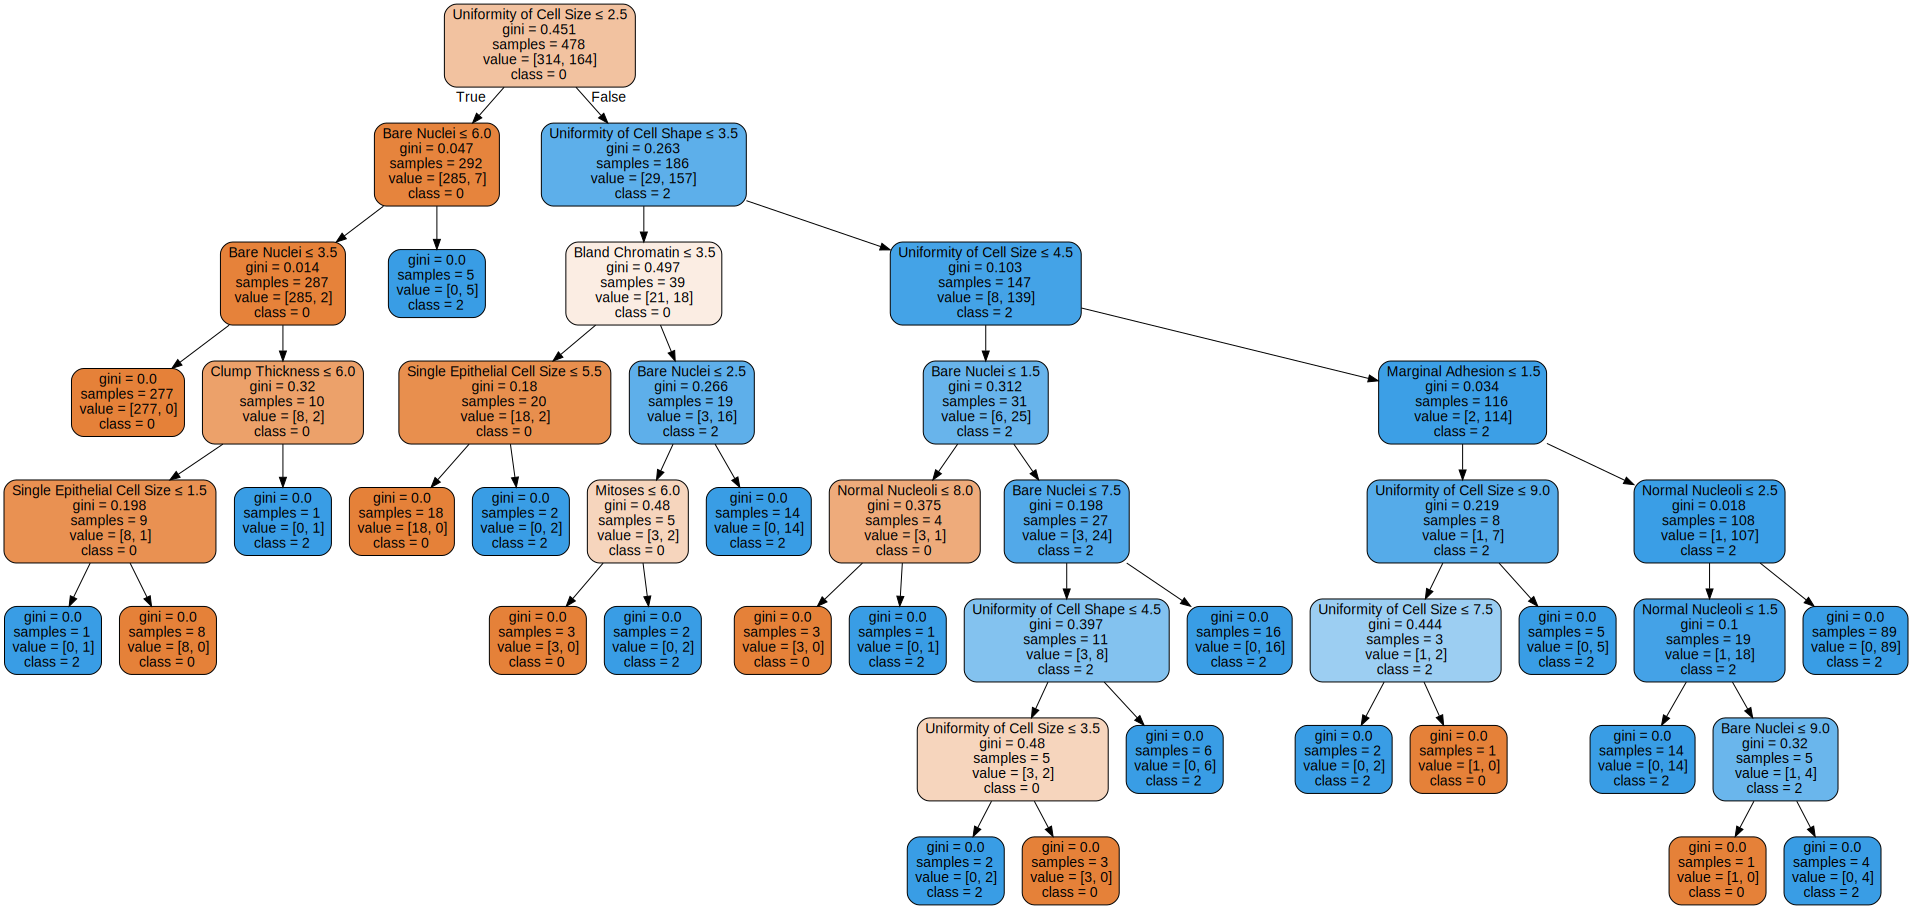

In [104]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['Clump Thickness', 'Uniformity of Cell Size',
                                        'Uniformity of Cell Shape', 'Marginal Adhesion',
                                        'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                                        'Normal Nucleoli', 'Mitoses'],  
                         class_names=['0','2'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Podemos ver que el árbol generado es muy complejo, aun asi vamos a evaluar su `accuracy`

In [105]:
prediction = clf.predict(X_test)
columns = ['Predicted Value', 'Actual Value']
results = pd.DataFrame()
results['Predicted Value'] = prediction
results['Actual Value']    = y_test.values

In [106]:
results.head()

,Predicted Value,Actual Value
0,2,2
1,2,2
2,4,4
3,4,4
4,2,2


In [107]:
wrong_predictions = results[results['Predicted Value'] != results['Actual Value']]
accuracy = (len(results)-len(wrong_predictions))/len(results)
accuracy

0.9365853658536586

Intentemos modificar los hiperparametros para intentar encontrar un modelo mas simple. Para esto vamos a darle una profundidad maxima de 3.

In [108]:
simple_clf = tree.DecisionTreeClassifier(max_depth=3)
simple_clf = simple_clf.fit(X_train, y_train)

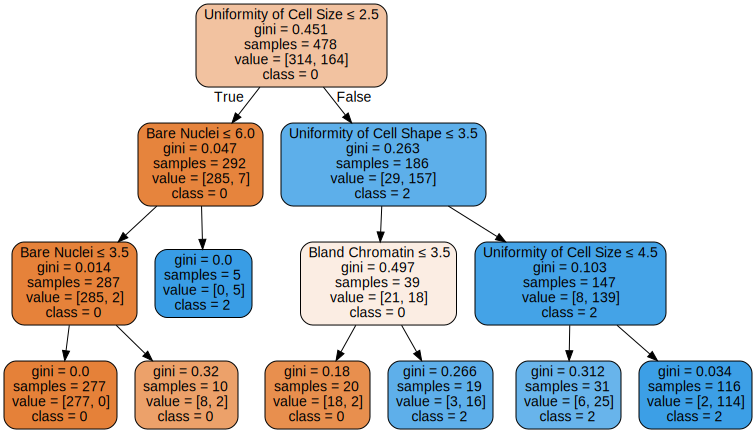

In [115]:
dot_data = tree.export_graphviz(simple_clf, out_file=None, 
                         feature_names=['Clump Thickness', 'Uniformity of Cell Size',
                                        'Uniformity of Cell Shape', 'Marginal Adhesion',
                                        'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                                        'Normal Nucleoli', 'Mitoses'],  
                         class_names=['0','2'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Rapidamente podemos notar que este árbol es mucho mas simple, ahora evaluaremos su `accuracy`.

In [110]:
prediction = simple_clf.predict(X_test)
columns = ['Predicted Value', 'Actual Value']
results = pd.DataFrame()
results['Predicted Value'] = prediction
results['Actual Value']    = y_test.values

In [111]:
wrong_predictions = results[results['Predicted Value'] != results['Actual Value']]
simple_accuracy = (len(results)-len(wrong_predictions))/len(results)
simple_accuracy

0.9365853658536586

In [127]:
#Diferencia entre los clasificadores
simple_accuracy - accuracy

0.0

Podemos ver que tenemos exactamente los mismos resultados con un árbol mucho mas simple.

Ahora intentemos reducir la profundidad maxima a 2 y comparemos los resultados.

In [117]:
super_simple_clf = tree.DecisionTreeClassifier(max_depth=2)
super_simple_clf = super_simple_clf.fit(X_train, y_train)

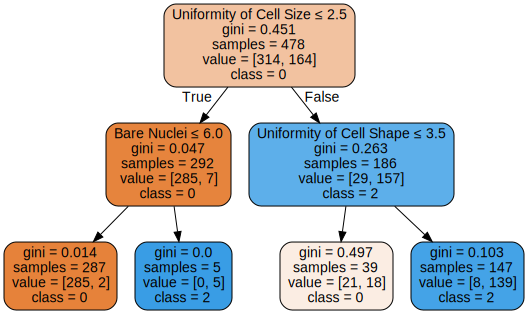

In [118]:
dot_data = tree.export_graphviz(super_simple_clf, out_file=None, 
                         feature_names=['Clump Thickness', 'Uniformity of Cell Size',
                                        'Uniformity of Cell Shape', 'Marginal Adhesion',
                                        'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                                        'Normal Nucleoli', 'Mitoses'],  
                         class_names=['0','2'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Este árbol es mucho mas simple, ahora evaluaremos su `accuracy`.

In [121]:
prediction = super_simple_clf.predict(X_test)
columns = ['Predicted Value', 'Actual Value']
results = pd.DataFrame()
results['Predicted Value'] = prediction
results['Actual Value']    = y_test.values

In [122]:
wrong_predictions = results[results['Predicted Value'] != results['Actual Value']]
super_simple_accuracy = (len(results)-len(wrong_predictions))/len(results)
super_simple_accuracy

0.926829268292683

In [126]:
#Diferencia entre los clasificadores
super_simple_accuracy - accuracy

-0.009756097560975618

Podemos ver que empeora en un `0.00975`. Pero al ser un árbol tan simple es preferible quedarnos con este. También podemos notar que `Uniformity of Cell Size`, `Uniformity of Cell Shape` y `Bare Nuclei` son de los atributos mas importantes para la clasifiación ya que se encuentran en la parte superior de todos los árboles.